In this section, we will try and look at what happens when we compare the income and the AP scores of students during the pandemic. 
Through this comparision we will then be able to learn more about how education changed during the pandemic. 

Indeed, as we saw earlier, the graduation rates increased during the pandemic meaning that if we can't possibly measure the education loss. However, taking the AP means that students are more willing to learn and if their has been educational loss, it would make sense that it would be felt more through the APs, hence this analysis. 

How do AP scores work: 
- they are additional classes that high school students can take in addition to high school normal classes. They are college level curicula 
- they are scored on a scale from 1 to 5 with an average mean of 2.8 
- most of the students that take it are going to college after that 

In [ ]:
from google.colab import drive

import pandas
import numpy

import matplotlib as plt
%matplotlib inline

In [ ]:
data_19 = pandas.read_csv('/content/drive/MyDrive/QM2 /Data_NY_19.csv')
data_20 = pandas.read_csv('/content/drive/MyDrive/QM2 /Data_NY_20.csv')
data_income = pandas.read_csv('/content/drive/MyDrive/QM2 /Income-county-data.csv')
data_income

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (4) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,COUNTY,"Median household income (in 2019 dollars), 2015-2019"
0,Albany,66252
1,Allegany,48412
2,Bronx,40088
3,Broome,52226
4,Cattaraugus,48703
...,...,...
57,Washington,57258
58,Wayne,59449
59,Westchester,96610
60,Wyoming,58052


First quartile  :  54152.0
Third quartile  :  65360.25


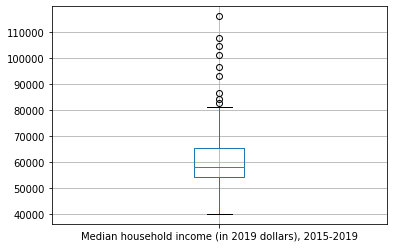

In [ ]:
data_income.boxplot()
print("First quartile  : ", numpy.quantile(data_income['Median household income (in 2019 dollars), 2015-2019'], .25))
print("Third quartile  : ", numpy.quantile(data_income['Median household income (in 2019 dollars), 2015-2019'], .75))
income_first_quartile = data_income.loc[data_income['Median household income (in 2019 dollars), 2015-2019'] <= 50862]
income_third_quartile = data_income.loc[data_income['Median household income (in 2019 dollars), 2015-2019'] >= 59933.75]

low_income_counties = income_first_quartile['COUNTY']
high_income_counties = income_third_quartile['COUNTY']

**Start general analysis**

In [ ]:
data_20 = data_20.drop('level6_cnt', 1)
data_20 = data_20.drop('level7_cnt', 1)

#Analysis by county
#Cleaning the data
county_data_20 = data_20.loc[data_20['aggregation_type'] == 3]
county_data_20 = county_data_20.loc[county_data_20['apib_ind'] == 'AP']
county_data_20 = county_data_20.loc[county_data_20['subgroup_name'] == 'All Students']
county_data_20 = county_data_20.loc[county_data_20['item_desc'] == 'All AP Assessments']
county_data_20



,aggregation_type,aggregation_code,aggregation_name,needs_resource_code,needs_resource_desc,county_code,county_desc,subgroup_code,subgroup_name,student_gender,ethnic_desc,swd_ind,ell_ind,eco_dis_ind,apib_ind,state_code,item_desc,item_subject_area,student_cnt,proficient_student_cnt,assessment_cnt,level1_cnt,level2_cnt,level3_cnt,level4_cnt,level5_cnt
22486,3,10000000000,ALBANY,0,NaN,1.0,ALBANY,1,All Students,NaN,NaN,0,0,0,AP,NaN,All AP Assessments,NaN,1814,1454,3198,210,506,823,916,743
23264,3,20000000000,ALLEGANY,0,NaN,2.0,ALLEGANY,1,All Students,NaN,NaN,0,0,0,AP,NaN,All AP Assessments,NaN,30,14,35,8,11,11,2,3
23328,3,30000000000,BROOME,0,NaN,3.0,BROOME,1,All Students,NaN,NaN,0,0,0,AP,NaN,All AP Assessments,NaN,526,357,850,113,220,221,190,106
24227,3,40000000000,CATTARAUGUS,0,NaN,4.0,CATTARAUGUS,1,All Students,NaN,NaN,0,0,0,AP,NaN,All AP Assessments,NaN,150,82,180,39,42,53,30,16
24435,3,50000000000,CAYUGA,0,NaN,5.0,CAYUGA,1,All Students,NaN,NaN,0,0,0,AP,NaN,All AP Assessments,NaN,41,33,45,1,9,15,16,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62072,3,640000000000,WASHINGTON,0,NaN,64.0,WASHINGTON,1,All Students,NaN,NaN,0,0,0,AP,NaN,All AP Assessments,NaN,234,167,340,31,78,104,79,48
62292,3,650000000000,WAYNE,0,NaN,65.0,WAYNE,1,All Students,NaN,NaN,0,0,0,AP,NaN,All AP Assessments,NaN,316,232,407,35,91,148,87,46
62550,3,660000000000,WESTCHESTER,0,NaN,66.0,WESTCHESTER,1,All Students,NaN,NaN,0,0,0,AP,NaN,All AP Assessments,NaN,9928,8274,19015,1108,2877,5000,5566,4464
64846,3,670000000000,WYOMING,0,NaN,67.0,WYOMING,1,All Students,NaN,NaN,0,0,0,AP,NaN,All AP Assessments,NaN,66,40,87,10,29,28,12,8


In [ ]:
county_average_20 = []
print(type(int(county_data_20['level5_cnt'].values[0])))
for x in range(0, len(county_data_20['level5_cnt'])):
  average = (5 * int(county_data_20['level5_cnt'].values[x]) + 4 * int(county_data_20['level4_cnt'].values[x]) + 3 * int(county_data_20['level3_cnt'].values[x]) + 2 * int(county_data_20['level2_cnt'].values[x]) + int(county_data_20['level1_cnt'].values[x]))/county_data_20['assessment_cnt'].values[x]
  county_average_20.append(average)
county_data_20.insert(1, "County_Average", county_average_20, True)
county_data_20

<class 'int'>


,aggregation_type,County_Average,aggregation_code,aggregation_name,needs_resource_code,needs_resource_desc,county_code,county_desc,subgroup_code,subgroup_name,student_gender,ethnic_desc,swd_ind,ell_ind,eco_dis_ind,apib_ind,state_code,item_desc,item_subject_area,student_cnt,proficient_student_cnt,assessment_cnt,level1_cnt,level2_cnt,level3_cnt,level4_cnt,level5_cnt
22486,3,3.461538,10000000000,ALBANY,0,NaN,1.0,ALBANY,1,All Students,NaN,NaN,0,0,0,AP,NaN,All AP Assessments,NaN,1814,1454,3198,210,506,823,916,743
23264,3,2.457143,20000000000,ALLEGANY,0,NaN,2.0,ALLEGANY,1,All Students,NaN,NaN,0,0,0,AP,NaN,All AP Assessments,NaN,30,14,35,8,11,11,2,3
23328,3,2.948235,30000000000,BROOME,0,NaN,3.0,BROOME,1,All Students,NaN,NaN,0,0,0,AP,NaN,All AP Assessments,NaN,526,357,850,113,220,221,190,106
24227,3,2.677778,40000000000,CATTARAUGUS,0,NaN,4.0,CATTARAUGUS,1,All Students,NaN,NaN,0,0,0,AP,NaN,All AP Assessments,NaN,150,82,180,39,42,53,30,16
24435,3,3.288889,50000000000,CAYUGA,0,NaN,5.0,CAYUGA,1,All Students,NaN,NaN,0,0,0,AP,NaN,All AP Assessments,NaN,41,33,45,1,9,15,16,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62072,3,3.102941,640000000000,WASHINGTON,0,NaN,64.0,WASHINGTON,1,All Students,NaN,NaN,0,0,0,AP,NaN,All AP Assessments,NaN,234,167,340,31,78,104,79,48
62292,3,3.044226,650000000000,WAYNE,0,NaN,65.0,WAYNE,1,All Students,NaN,NaN,0,0,0,AP,NaN,All AP Assessments,NaN,316,232,407,35,91,148,87,46
62550,3,3.494399,660000000000,WESTCHESTER,0,NaN,66.0,WESTCHESTER,1,All Students,NaN,NaN,0,0,0,AP,NaN,All AP Assessments,NaN,9928,8274,19015,1108,2877,5000,5566,4464
64846,3,2.758621,670000000000,WYOMING,0,NaN,67.0,WYOMING,1,All Students,NaN,NaN,0,0,0,AP,NaN,All AP Assessments,NaN,66,40,87,10,29,28,12,8


In [ ]:
data_19 = data_19.drop('level6_cnt', 1)
data_19 = data_19.drop('level7_cnt', 1)

In [ ]:
#Analysis by county
#Cleaning the data
county_data_19 = data_19.loc[data_19['aggregation_type'] == 3]
county_data_19 = county_data_19.loc[county_data_19['apib_ind'] == 'AP']
county_data_19 = county_data_19.loc[county_data_19['subgroup_name'] == 'All Students']
county_data_19 = county_data_19.loc[county_data_19['item_desc'] == 'All AP Assessments']
county_data_19

,aggregation_type,aggregation_code,aggregation_name,needs_resource_code,needs_resource_desc,county_code,county_desc,subgroup_code,subgroup_name,student_gender,ethnic_desc,swd_ind,ell_ind,econ disadvantaged,apib_ind,state_code,item_desc,item_subject_area,tested_cnt,level1_cnt,level2_cnt,level3_cnt,level4_cnt,level5_cnt
23329,3,10000000000,ALBANY,0,NaN,1.0,ALBANY,1,All Students,NaN,NaN,0,0,0,AP,NaN,All AP Assessments,NaN,3826,373,691,987,1010,765
24266,3,20000000000,ALLEGANY,0,NaN,2.0,ALLEGANY,1,All Students,NaN,NaN,0,0,0,AP,NaN,All AP Assessments,NaN,14,0,1,4,8,1
24290,3,30000000000,BROOME,0,NaN,3.0,BROOME,1,All Students,NaN,NaN,0,0,0,AP,NaN,All AP Assessments,NaN,647,80,218,179,114,56
24796,3,40000000000,CATTARAUGUS,0,NaN,4.0,CATTARAUGUS,1,All Students,NaN,NaN,0,0,0,AP,NaN,All AP Assessments,NaN,263,45,78,79,44,17
25032,3,50000000000,CAYUGA,0,NaN,5.0,CAYUGA,1,All Students,NaN,NaN,0,0,0,AP,NaN,All AP Assessments,NaN,81,15,29,23,11,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62219,3,640000000000,WASHINGTON,0,NaN,64.0,WASHINGTON,1,All Students,NaN,NaN,0,0,0,AP,NaN,All AP Assessments,NaN,351,23,102,95,87,44
62429,3,650000000000,WAYNE,0,NaN,65.0,WAYNE,1,All Students,NaN,NaN,0,0,0,AP,NaN,All AP Assessments,NaN,487,44,172,149,79,43
62817,3,660000000000,WESTCHESTER,0,NaN,66.0,WESTCHESTER,1,All Students,NaN,NaN,0,0,0,AP,NaN,All AP Assessments,NaN,18975,1417,3250,5056,5080,4172
65825,3,670000000000,WYOMING,0,NaN,67.0,WYOMING,1,All Students,NaN,NaN,0,0,0,AP,NaN,All AP Assessments,NaN,107,8,51,29,16,3


In [ ]:
county_average_19 = []
for x in range(0, len(county_data_19['level5_cnt'])):
  average = (5 * int(county_data_19['level5_cnt'].values[x]) + 4 * int(county_data_19['level4_cnt'].values[x]) + 3 * int(county_data_19['level3_cnt'].values[x]) + 2 * int(county_data_19['level2_cnt'].values[x]) + int(county_data_19['level1_cnt'].values[x]))/county_data_19['tested_cnt'].values[x]
  county_average_19.append(average)
county_data_19.insert(1, "County_Average", county_average_19, True)
county_data_19

,aggregation_type,County_Average,aggregation_code,aggregation_name,needs_resource_code,needs_resource_desc,county_code,county_desc,subgroup_code,subgroup_name,student_gender,ethnic_desc,swd_ind,ell_ind,econ disadvantaged,apib_ind,state_code,item_desc,item_subject_area,tested_cnt,level1_cnt,level2_cnt,level3_cnt,level4_cnt,level5_cnt
23329,3,3.288291,10000000000,ALBANY,0,NaN,1.0,ALBANY,1,All Students,NaN,NaN,0,0,0,AP,NaN,All AP Assessments,NaN,3826,373,691,987,1010,765
24266,3,3.642857,20000000000,ALLEGANY,0,NaN,2.0,ALLEGANY,1,All Students,NaN,NaN,0,0,0,AP,NaN,All AP Assessments,NaN,14,0,1,4,8,1
24290,3,2.765070,30000000000,BROOME,0,NaN,3.0,BROOME,1,All Students,NaN,NaN,0,0,0,AP,NaN,All AP Assessments,NaN,647,80,218,179,114,56
24796,3,2.657795,40000000000,CATTARAUGUS,0,NaN,4.0,CATTARAUGUS,1,All Students,NaN,NaN,0,0,0,AP,NaN,All AP Assessments,NaN,263,45,78,79,44,17
25032,3,2.481481,50000000000,CAYUGA,0,NaN,5.0,CAYUGA,1,All Students,NaN,NaN,0,0,0,AP,NaN,All AP Assessments,NaN,81,15,29,23,11,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62219,3,3.076923,640000000000,WASHINGTON,0,NaN,64.0,WASHINGTON,1,All Students,NaN,NaN,0,0,0,AP,NaN,All AP Assessments,NaN,351,23,102,95,87,44
62429,3,2.804928,650000000000,WAYNE,0,NaN,65.0,WAYNE,1,All Students,NaN,NaN,0,0,0,AP,NaN,All AP Assessments,NaN,487,44,172,149,79,43
62817,3,3.386825,660000000000,WESTCHESTER,0,NaN,66.0,WESTCHESTER,1,All Students,NaN,NaN,0,0,0,AP,NaN,All AP Assessments,NaN,18975,1417,3250,5056,5080,4172
65825,3,2.579439,670000000000,WYOMING,0,NaN,67.0,WYOMING,1,All Students,NaN,NaN,0,0,0,AP,NaN,All AP Assessments,NaN,107,8,51,29,16,3


Mean:  2.9773917222226083
Median:  2.992011952191235
Stdev:  0.32829540303031673


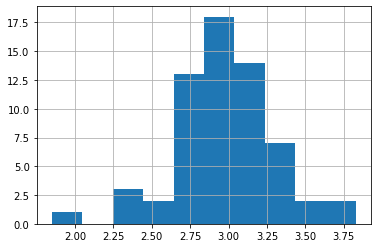

In [ ]:
import seaborn 

county_data_20['County_Average'].hist()
print('Mean: ', county_data_20['County_Average'].mean())
print('Median: ', county_data_20['County_Average'].median())
print('Stdev: ', county_data_20['County_Average'].std())


Mean:  2.929200260723375
Median:  2.9100449775112445
Stdev:  0.37610367417145396


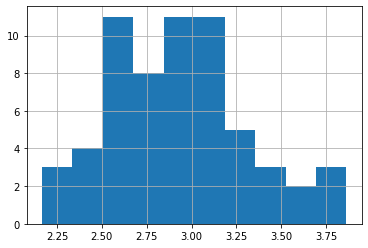

In [ ]:
county_data_19['County_Average'].hist()
print('Mean: ', county_data_19['County_Average'].mean())
print('Median: ', county_data_19['County_Average'].median())
print('Stdev: ', county_data_19['County_Average'].std())

**CLES**

In [ ]:
# effect size in CLES by comparing all elements with one another
g = 0
t = 0
for x in county_average_19:
    for y in county_average_20:
        if x > y:
            g+=1
        t+=1
cles = g/t
print(f"The CLES is: {cles}")

The CLES is: 0.44288736118455846


**Violin Plot**

61
62


,Year,County,County_Average,Dummy
23329,19,ALBANY,3.288291,1
24266,19,ALLEGANY,3.642857,1
24290,19,BROOME,2.765070,1
24796,19,CATTARAUGUS,2.657795,1
25032,19,CAYUGA,2.481481,1
...,...,...,...,...
62072,20,WASHINGTON,3.102941,1
62292,20,WAYNE,3.044226,1
62550,20,WESTCHESTER,3.494399,1
64846,20,WYOMING,2.758621,1


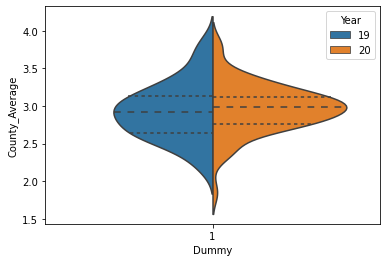

In [ ]:
year = []
for x in range(0, 123):
  if x < 62:
    year.append(19)
  else:
    year.append(20)

print(len(county_average_19))
print(len(county_average_20))

comparison_19 = pandas.DataFrame()
comparison_20 = pandas.DataFrame()
comparison = pandas.DataFrame()
comparison_19.insert(0, "County", county_data_19["aggregation_name"], True)
comparison_19.insert(1, "County_Average", county_average_19, True)
comparison_20.insert(0, "County", county_data_20["aggregation_name"], True)
comparison_20.insert(1, "County_Average", county_average_20, True)
comparison = pandas.concat([comparison_19, comparison_20])
comparison.insert(0, "Year", year, True)
comparison['Dummy'] = [1]*len(comparison.index)
seaborn.violinplot(data=comparison, x = 'Dummy', y= 'County_Average', hue = 'Year', split=True, inner='quartile')
comparison


In [ ]:
from scipy import stats
stats.ttest_ind(county_average_19, county_average_20)
print(stats.ttest_ind(county_average_19, county_average_20))
# p-value: prob that results that we have are not different 
# likely that it's coincidence that they are a bit higher in one year than the other 
#t-score = -0.0486; p-value = 0.9614; thus, these samples differ very little and are likely to be from the same population.
for x in county_data_20['aggregation_name']:
    if x not in list(county_data_19['aggregation_name']):
      print(x)
# Schuyler county is NOT in the 2019 data.

Ttest_indResult(statistic=-0.7574154450816412, pvalue=0.4502734747244814)
SCHUYLER


start comparison Q1 and Q3 for income 

How APs are different in low and high income counties 

In [ ]:
import numpy as np

median_income = data_income['Median household income (in 2019 dollars), 2015-2019'].astype(float)

# First quartile (Q1)
Q1 = np.quantile(data_income['Median household income (in 2019 dollars), 2015-2019'], 0.25)
print(Q1)
# Third quartile (Q3)
Q3 = np.quantile(data_income['Median household income (in 2019 dollars), 2015-2019'], 0.75)
print(Q3)

54152.0
65360.25


In [ ]:
low_income_data = data_income.loc[data_income['Median household income (in 2019 dollars), 2015-2019'] <= 54152.0]
print(low_income_data)
high_income_data = data_income.loc[data_income['Median household income (in 2019 dollars), 2015-2019'] >= 65360.25]
print(high_income_data)

          COUNTY  Median household income (in 2019 dollars), 2015-2019
1      Allegany                                               48412   
2         Bronx                                               40088   
3         Broome                                              52226   
4   Cattaraugus                                               48703   
6    Chautauqua                                               46820   
8      Chenango                                               52002   
12     Delaware                                               49544   
16     Franklin                                               50407   
17       Fulton                                               50482   
19       Greene                                               53601   
22    Jefferson                                               52685   
28   Montgomery                                               49462   
36      Orleans                                               52620   
38    

**DIFFERENCE Q1 FOR 2019 AND 2020**


In [ ]:

county_data_20 = county_data_20.drop(56849, axis = 0)

# list county for 2020 + make it a list 
list_of_county = county_data_20['aggregation_name'].to_list()

new_list_county_20 = [s.replace("County: ", "") for s in list_of_county]

# list county 2019 
list_county_19 = county_data_19['aggregation_name'].to_list()

new_list_county_19 = [s.replace("County: ", "") for s in list_county_19]

# list low and high income 
low_income_list_19 = low_income_data['COUNTY'].to_list()
county_low_income_list_19 = low_income_list_19 = [s.replace(" ", "") for s in low_income_list_19]

high_income_list_19 = high_income_data['COUNTY'].to_list()
county_high_income_list_19 = [s.replace(" ", "") for s in high_income_list_19]

# NEW LOWER CASE LIST TO USE 
# put every list lower case
low_income_19 = [each_string.lower() for each_string in county_low_income_list_19]

high_income_19 =[each_string.lower() for each_string in county_high_income_list_19]

county_19 = [each_string.lower() for each_string in new_list_county_19]
county_20 = [each_string.lower() for each_string in new_list_county_20] 

# list of Q1 2019 
new_list = []
for county in county_19:
    if county in low_income_19:
        new_list.append(county)
# list of Q1 2020 
new_list_20 = []
for county in county_20:
    if county in low_income_19:
        new_list_20.append(county)

# dataframe 2019 with Q1 county 
clean_county_data2 = county_data_19.replace("County: ", "", regex = True)
clean_county_data2['aggregation_name'] = clean_county_data2['aggregation_name'].str.lower()

df_poor = pandas.DataFrame(new_list, columns = ['aggregation_name'])

df_joined_Q1 = df_poor.merge(clean_county_data2, left_on = 'aggregation_name', right_on = 'aggregation_name', how = 'left')

# dataframe 2020 with Q1 county 
clean_county_data_20 = county_data_20.replace("County: ", "", regex = True)
clean_county_data_20['aggregation_name'] = clean_county_data_20['aggregation_name'].str.lower()

df_poor_20 = pandas.DataFrame(new_list_20, columns = ['aggregation_name'])
df_poor_20

df_joined_Q1_20 = df_poor_20.merge(clean_county_data_20, left_on = 'aggregation_name', right_on = 'aggregation_name', how = 'left')
df_joined_Q1_20

,aggregation_name,aggregation_type,County_Average,aggregation_code,needs_resource_code,needs_resource_desc,county_code,county_desc,subgroup_code,subgroup_name,student_gender,ethnic_desc,swd_ind,ell_ind,eco_dis_ind,apib_ind,state_code,item_desc,item_subject_area,student_cnt,proficient_student_cnt,assessment_cnt,level1_cnt,level2_cnt,level3_cnt,level4_cnt,level5_cnt
0,allegany,3,2.457143,20000000000,0,NaN,2.0,ALLEGANY,1,All Students,NaN,NaN,0,0,0,AP,NaN,All AP Assessments,NaN,30,14,35,8,11,11,2,3
1,broome,3,2.948235,30000000000,0,NaN,3.0,BROOME,1,All Students,NaN,NaN,0,0,0,AP,NaN,All AP Assessments,NaN,526,357,850,113,220,221,190,106
2,cattaraugus,3,2.677778,40000000000,0,NaN,4.0,CATTARAUGUS,1,All Students,NaN,NaN,0,0,0,AP,NaN,All AP Assessments,NaN,150,82,180,39,42,53,30,16
3,chautauqua,3,3.020539,60000000000,0,NaN,6.0,CHAUTAUQUA,1,All Students,NaN,NaN,0,0,0,AP,NaN,All AP Assessments,NaN,465,328,779,104,152,251,168,104
4,chenango,3,2.909910,80000000000,0,NaN,8.0,CHENANGO,1,All Students,NaN,NaN,0,0,0,AP,NaN,All AP Assessments,NaN,86,53,111,10,34,36,18,13
5,delaware,3,2.411765,120000000000,0,NaN,12.0,DELAWARE,1,All Students,NaN,NaN,0,0,0,AP,NaN,All AP Assessments,NaN,45,21,51,14,13,16,5,3
6,franklin,3,2.920290,160000000000,0,NaN,16.0,FRANKLIN,1,All Students,NaN,NaN,0,0,0,AP,NaN,All AP Assessments,NaN,93,57,138,12,39,48,26,13
7,fulton,3,2.758621,170000000000,0,NaN,17.0,FULTON,1,All Students,NaN,NaN,0,0,0,AP,NaN,All AP Assessments,NaN,157,94,232,34,61,82,37,18
8,greene,3,3.112500,190000000000,0,NaN,19.0,GREENE,1,All Students,NaN,NaN,0,0,0,AP,NaN,All AP Assessments,NaN,62,41,80,10,16,24,15,15
9,jefferson,3,2.887701,220000000000,0,NaN,22.0,JEFFERSON,1,All Students,NaN,NaN,0,0,0,AP,NaN,All AP Assessments,NaN,136,84,187,14,57,62,44,10


In [ ]:
differenceQ1 = []
#df_joined_Q1_20['County_Average'] = df_joined_Q1_20['grad_pct'].astype(str).str.replace('%', '').astype(float)
#print(len(df_joined_Q1))
#df_joined_Q1['grad_pct'] = df_joined_Q1['grad_pct'].astype(str).str.replace('%', '').astype(float)
#print(len(df_joined_Q1_20))

for i in range (0, len(df_joined_Q1_20)):
  
  difference_Q1 = df_joined_Q1_20['County_Average'].iloc[i] - df_joined_Q1['County_Average'].iloc[i]
  differenceQ1.append(difference_Q1)

print(differenceQ1)

[-1.1857142857142855, 0.18316574234021266, 0.01998310097169398, -0.032831633756905454, -0.2787693353731089, 0.2450980392156863, 0.02839796318057175, 0.15783017582118042, 0.46181506849315035, 0.0627005347593581, 0.3540156812884083, 0.11070537850384055, 0.37121007647323445, 0.2954482758620691, 0.4855346554896749]


In [ ]:
from statistics import mean
from statistics import median
from statistics import stdev
print('Mean: ', mean(differenceQ1))
print('Median: ', median(differenceQ1))
print('Stdev: ', stdev(differenceQ1))

Mean:  0.0852392958369854
Median:  0.15783017582118042
Stdev:  0.4062967984312622


**Comparision Q3 2019 and 2020**

In [ ]:
# Q3 2019 
new_listQ3 = []
for county in county_19:
    if county in high_income_19:
        new_listQ3.append(county)
print(new_listQ3)

# Q3 2020 
new_list_20_Q3 = []
for county in county_20:
    if county in high_income_19:
        new_list_20_Q3.append(county)
print(new_list_20_Q3)

# dataframe 2019 with Q3 county 
clean_county_data2_rich = county_data_19.replace("County: ", "", regex = True)
clean_county_data2['aggregation_name'] = clean_county_data2['aggregation_name'].str.lower()

df_rich = pandas.DataFrame(new_listQ3, columns = ['aggregation_name'])

df_joined_Q3 = df_rich.merge(clean_county_data2_rich, left_on = 'aggregation_name', right_on = 'aggregation_name', how = 'left')

# dataframe 2020 with Q3 county 
clean_county_data_20_Q3 = county_data_20.replace("County: ", "", regex = True)
clean_county_data_20_Q3['aggregation_name'] = clean_county_data_20_Q3['aggregation_name'].str.lower()

df_rich_20 = pandas.DataFrame(new_list_20_Q3, columns = ['aggregation_name'])
df_rich_20

df_joined_Q3_20 = df_rich_20.merge(clean_county_data_20_Q3, left_on = 'aggregation_name', right_on = 'aggregation_name', how = 'left')
df_joined_Q3_20

# dataframe 2019 with Q3 county 
clean_county_data2 = county_data_19.replace("County: ", "", regex = True)
clean_county_data2['aggregation_name'] = clean_county_data2['aggregation_name'].str.lower()

df_rich_19 = pandas.DataFrame(new_listQ3, columns = ['aggregation_name'])

df_joined_Q3 = df_rich_19.merge(clean_county_data2, left_on = 'aggregation_name', right_on = 'aggregation_name', how = 'left')


['albany', 'columbia', 'dutchess', 'nassau', 'queens', 'richmond', 'orange', 'putnam', 'rensselaer', 'rockland', 'saratoga', 'schenectady', 'suffolk', 'westchester']
['albany', 'columbia', 'dutchess', 'nassau', 'queens', 'richmond', 'orange', 'putnam', 'rensselaer', 'rockland', 'saratoga', 'schenectady', 'suffolk', 'westchester']


In [ ]:
differenceQ3 = []

for i in range (0, len(df_joined_Q3_20)):
  
  difference_Q3 = df_joined_Q3_20['County_Average'].iloc[i] - df_joined_Q3['County_Average'].iloc[i]
  differenceQ3.append(difference_Q3)

print(differenceQ3)

[0.17324781856930338, 0.08039101254741787, 0.07210534773401855, 0.11717445296434059, 0.27193782184795356, 0.25047654270778885, 0.06581732343849644, 0.2967885434924562, -0.23604233183466894, 0.013402348692656663, -0.05971559607629651, -0.1798115047812905, 0.10847004041225716, 0.10757438912556694]


In [ ]:
print('Mean: ', mean(differenceQ3))
print('Median: ', median(differenceQ3))
print('Stdev: ', stdev(differenceQ3))

Mean:  0.07727258634571431
Median:  0.0939827008364924
Stdev:  0.1559209833507579


In [ ]:
# t-test Q1 and Q3 list 
from scipy import stats
stats.ttest_ind(differenceQ1, differenceQ3)
print(stats.ttest_ind(differenceQ1, differenceQ3))

Ttest_indResult(statistic=0.06872757043570715, pvalue=0.9457129427474735)


In [ ]:
# effect size in CLES by comparing all elements with one another
a = 0
b = 0
for x in differenceQ1:
    for y in differenceQ3:
        if x > y:
            a+=1
        b+=1
cles = a/b
print(f"The CLES is: {cles}")

The CLES is: 0.5952380952380952


**Violin Plot to show the Vizualise differences in Q1 and Q3**

   Quartile  Difference
0        Q1   -1.185714
1        Q1    0.183166
2        Q1    0.019983
3        Q1   -0.032832
4        Q1   -0.278769
5        Q1    0.245098
6        Q1    0.028398
7        Q1    0.157830
8        Q1    0.461815
9        Q1    0.062701
10       Q1    0.354016
11       Q1    0.110705
12       Q1    0.371210
13       Q1    0.295448
14       Q1    0.485535
0        Q3    0.173248
1        Q3    0.080391
2        Q3    0.072105
3        Q3    0.117174
4        Q3    0.271938
5        Q3    0.250477
6        Q3    0.065817
7        Q3    0.296789
8        Q3   -0.236042
9        Q3    0.013402
10       Q3   -0.059716
11       Q3   -0.179812
12       Q3    0.108470
13       Q3    0.107574


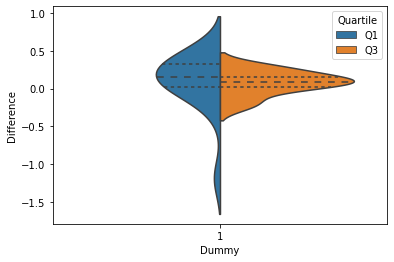

In [ ]:
import seaborn

listQ1 = []
for i in range(0, len(differenceQ1)):
  listQ1.append("Q1")

listQ3 = []
for i in range(0, len(differenceQ3)):
  listQ3.append("Q3")

comparisionQ1 = pandas.DataFrame()
comparisionQ3 = pandas.DataFrame()
comparision = pandas.DataFrame()
comparisionQ1.insert(0, "Quartile", listQ1, True)
comparisionQ1.insert(1, "Difference", differenceQ1, True)
comparisionQ1

comparisionQ3.insert(0, "Quartile", listQ3, True)
comparisionQ3.insert(1, "Difference", differenceQ3, True)

comparisionQ3

comparisionQ1Q3 = pandas.concat([comparisionQ1, comparisionQ3])
print(comparisionQ1Q3)

comparisionQ1Q3['Dummy'] = [1]*len(comparisionQ1Q3.index)
comparisionQ1Q3
seaborn.violinplot(data = comparisionQ1Q3, x = 'Dummy', y = 'Difference', hue = 'Quartile', split = True, inner = 'quartile')


**Methodology**

We used the same process than for the comparison between the income and the graduation rate. 

We compared the low income counties and their average AP results to the high income counties and their results. 
Through the violin plot, we found that the difference in the average AP results are much more significant in the low income counties than it is in the high income counties. 

However, the mean is both high and low income counties doen't change much wich would mean that covid didn't impact that much the AP scores and that, as we saw earlier through the t-test that maybe the change in results is only because of chance rather than external variables. 




















